# Preliminary Species Co-occurrance Analysis for Taxon 106656

### Importing modules

In [4]:
try:
    import pyobis
except:
    %pip -q install pyobis
    import pyobis

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as np
import cartopy
import geopandas as gpd
import geoplot as gplt
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [6]:
from pyobis.occurrences import OccQuery
occ = OccQuery()

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (15,10)

## Fetching data
We are fetching data for all *arthropods* to figure out co-occurrence between several zoo-planton species.

In [8]:
data = occ.search(
    geometry = "POLYGON ((152.3438 -66.5591, 54.1406 -66.5591, 54.1406 -42.1362, 152.3438 -42.1362, 152.3438 -66.5591))",
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    taxonid = 1065,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 274053/274053
Fetched 274053 records.


### Taxonomic distribution

<AxesSubplot:ylabel='scientificName'>

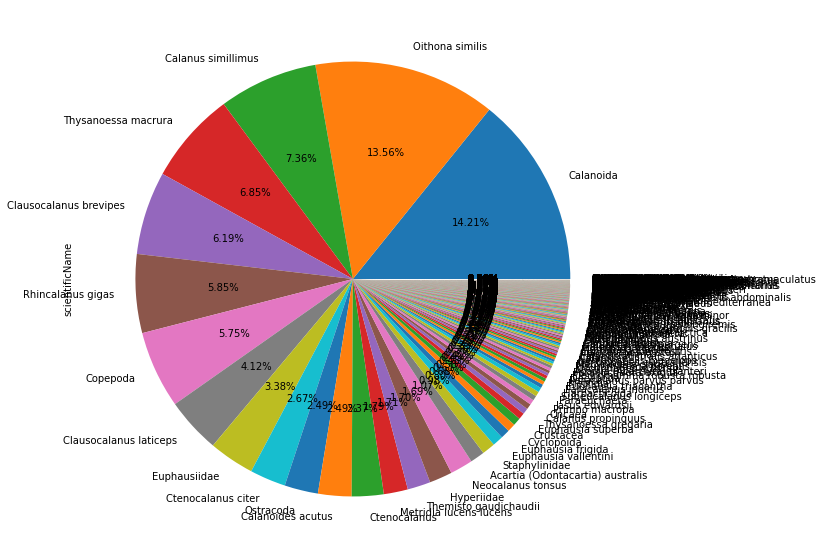

In [9]:
d = data.groupby("scientificName").scientificName.count().sort_values(ascending=False)
d.plot.pie(y="count", autopct="%.2f%%")

For simplicity purpose let us pick up top 20 species.

In [10]:
d = d[:20]

In [ ]:
list(data.columns)

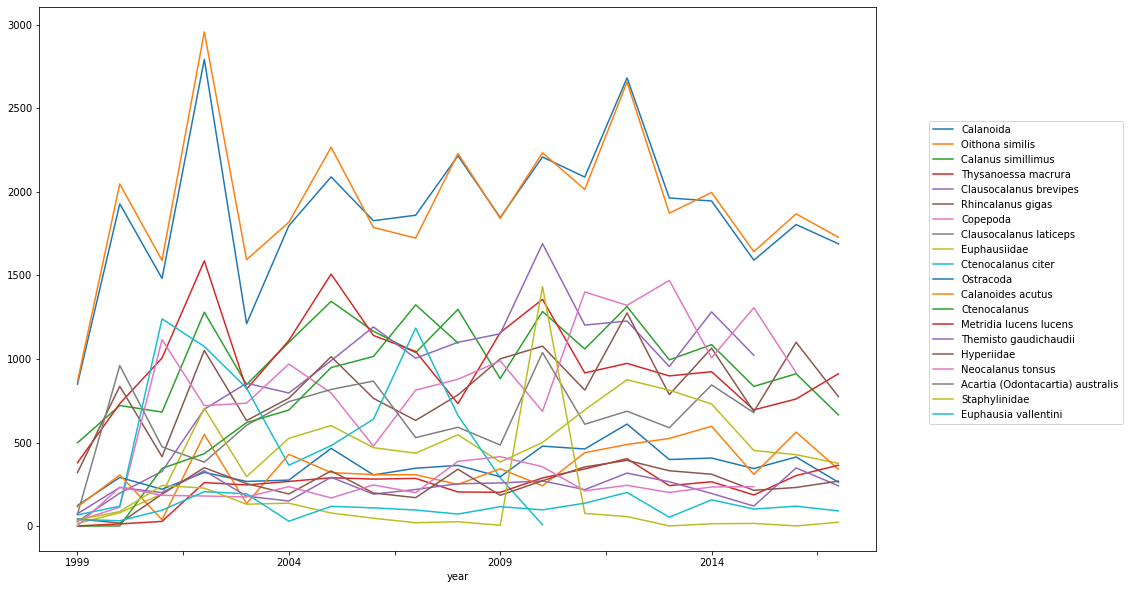

In [11]:
for i in d.index:
    data[data["scientificName"]==i].groupby("year").scientificName.count().plot(label=i)
plt.legend(bbox_to_anchor=[1.3, 0.8])

**Task**: find any two lines that are correlated to orange line -> Oithona similis.

We can see that *Oithona Similis* and *Calanoida* are highly related.

## Comparing Oithona Similis and Calanoida

### Shore Distance with time

In [12]:
data = data.sort_values(by="year")

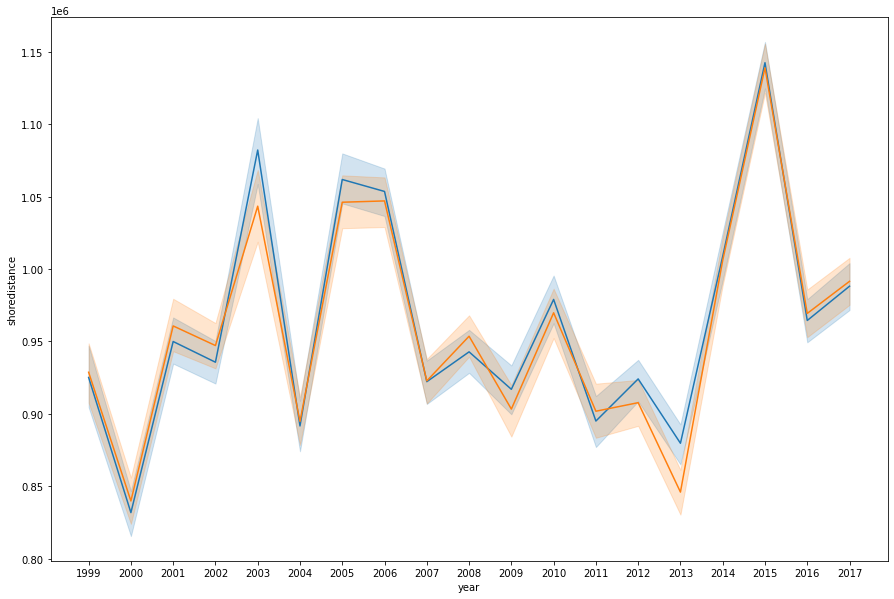

In [13]:
sns.lineplot(x = "year", y = "shoredistance", data = data[data["scientificName"]=="Oithona similis"]);
sns.lineplot(x = "year", y = "shoredistance", data = data[data["scientificName"]=="Calanoida"]);

+ [x] We can see that Oithona similis and Calanoida are highly correlated.

### Compare sea surface temperature with time

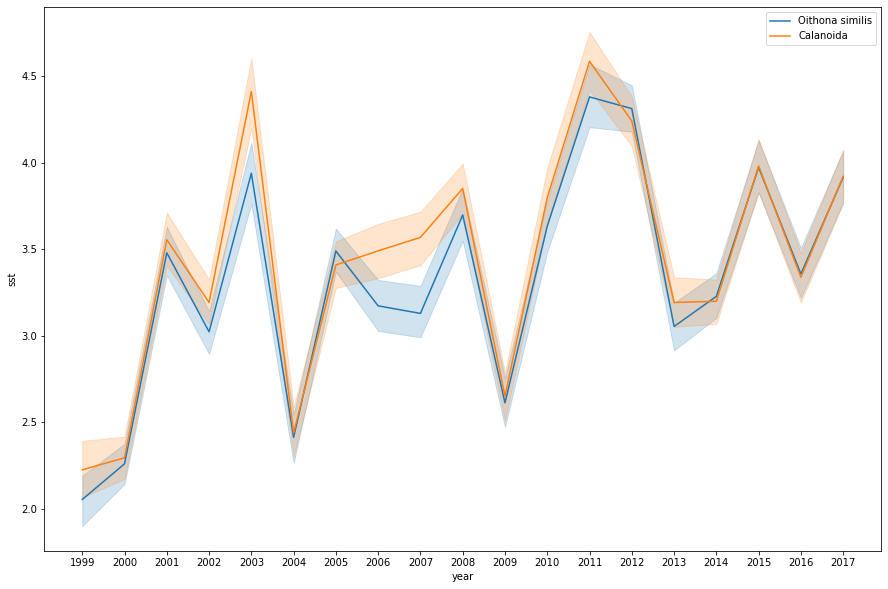

In [16]:
sns.lineplot(x = "year", y = "sst", data = data[data["scientificName"]=="Oithona similis"], label="Oithona similis");
sns.lineplot(x = "year", y = "sst", data = data[data["scientificName"]=="Calanoida"], label="Calanoida");
plt.legend()

+ [x] Both the species have very similar and overlapping sea surface temperature which means they are mostly found in same climatic conditions.

### Compare sea surface salinity with time

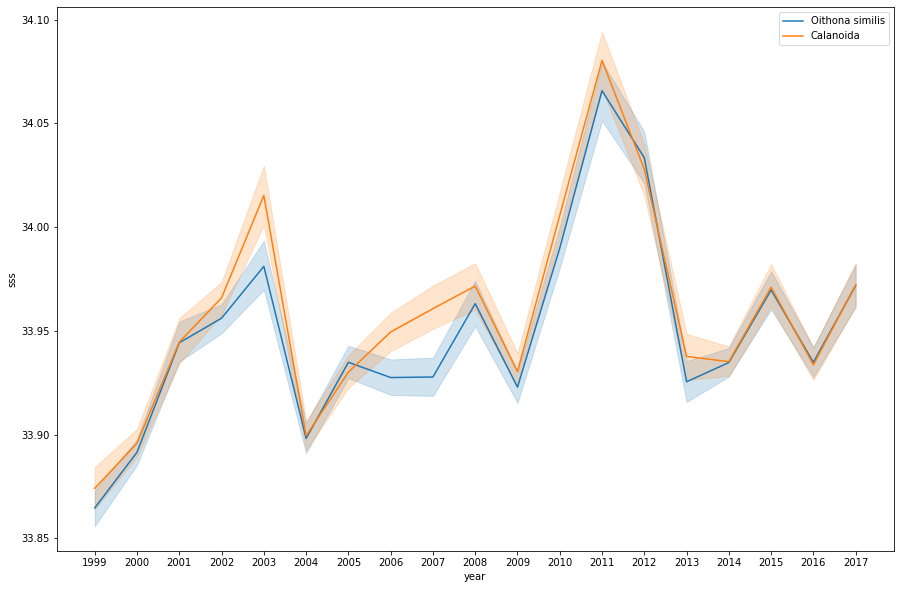

In [17]:
sns.lineplot(x = "year", y = "sss", data = data[data["scientificName"]=="Oithona similis"], label="Oithona similis");
sns.lineplot(x = "year", y = "sss", data = data[data["scientificName"]=="Calanoida"], label="Calanoida");
plt.legend()

+ [x] Both the species have very similar and overlapping sea surface salinity which means they are mostly found in same physical conditions.

In [ ]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", color="red", data=data[data["scientificName"]=="Oithona similis"], transform=cartopy.crs.PlateCarree(), label = "Oithona similis", alpha=0.05)
ax.scatter(x="decimalLongitude", y="decimalLatitude", color="yellow", data=data[data["scientificName"]=="Calanoida"], transform=cartopy.crs.PlateCarree(), label = "Calanoida", alpha=0.05)

ax.set_xlim(80,160)
ax.set_ylim(-80, -40)
ax.set_title("records on map")
plt.legend()
plt.show()

+ [x] We can clearly see that most of the region (~90%+) on this map are orange in color which means both of them are located simultaneously (red + yellow = orange), which means they are highly correlated.

## Figuring out other occurrences

Trying to find some patterns on sea surface salinity

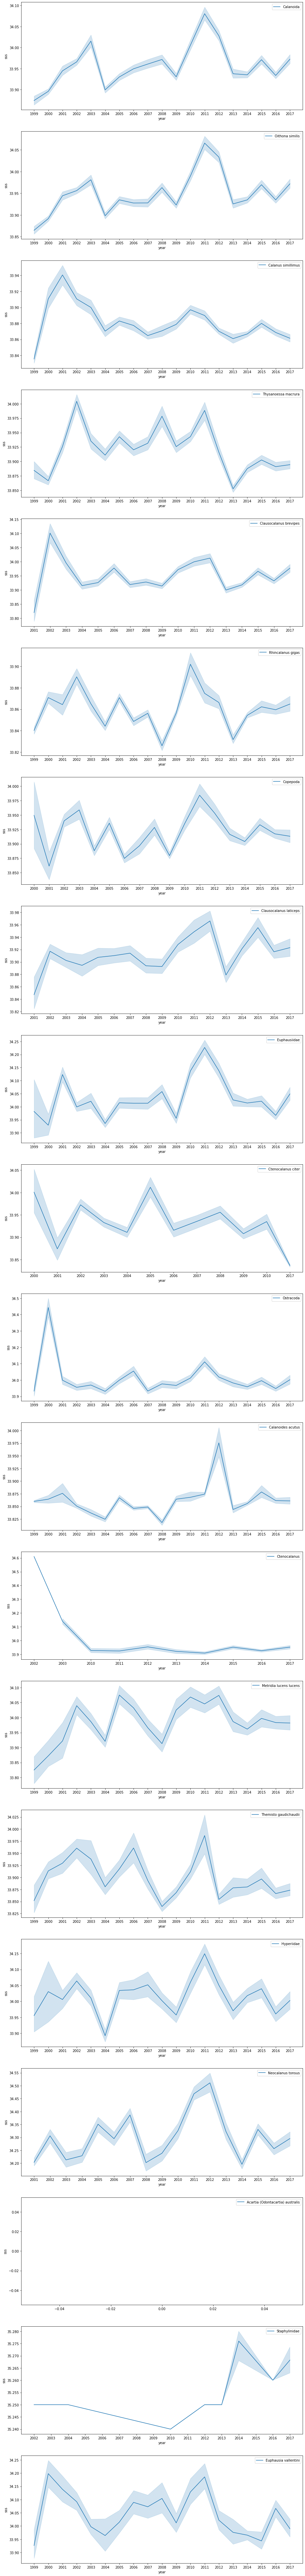

In [53]:
fig, ax = plt.subplots(20,1)
fig.set_figheight(140)
for i in range(len(d)):
    sns.lineplot(x = "year", y = "sss", data = data[data["scientificName"]==d.index[i]], label=d.index[i], ax = ax[i]);
plt.legend()

Trying to find patterns in sea surface temperature

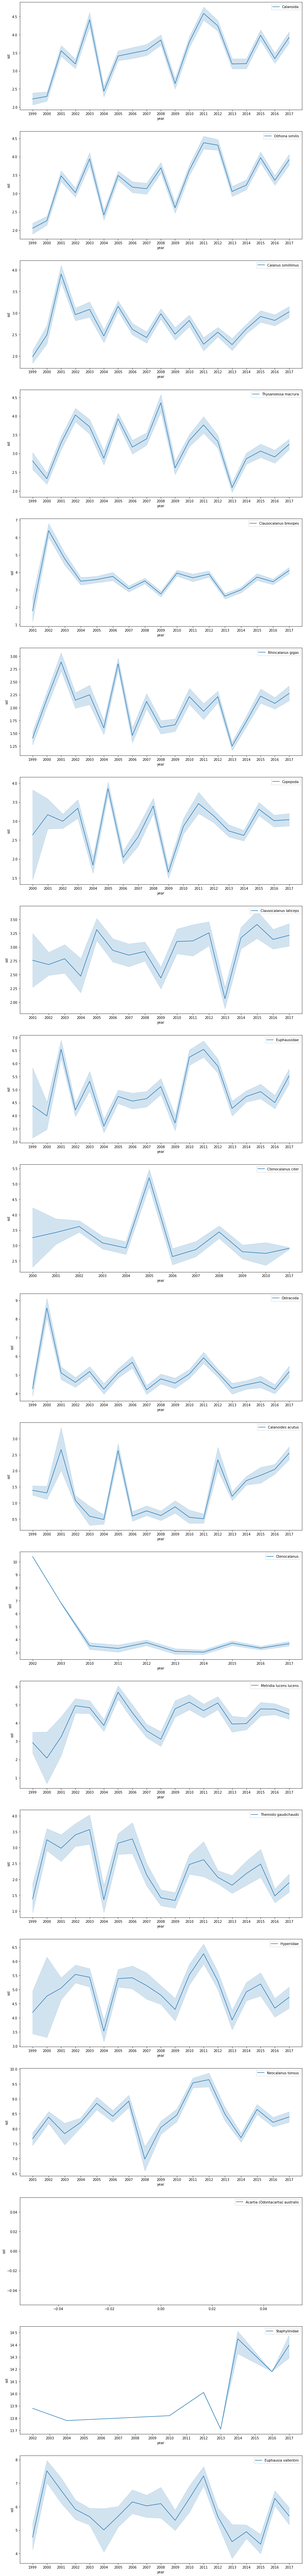

In [54]:
fig, ax = plt.subplots(20,1)
fig.set_figheight(140)
for i in range(len(d)):
    sns.lineplot(x = "year", y = "sst", data = data[data["scientificName"]==d.index[i]], label=d.index[i], ax = ax[i]);
plt.legend()

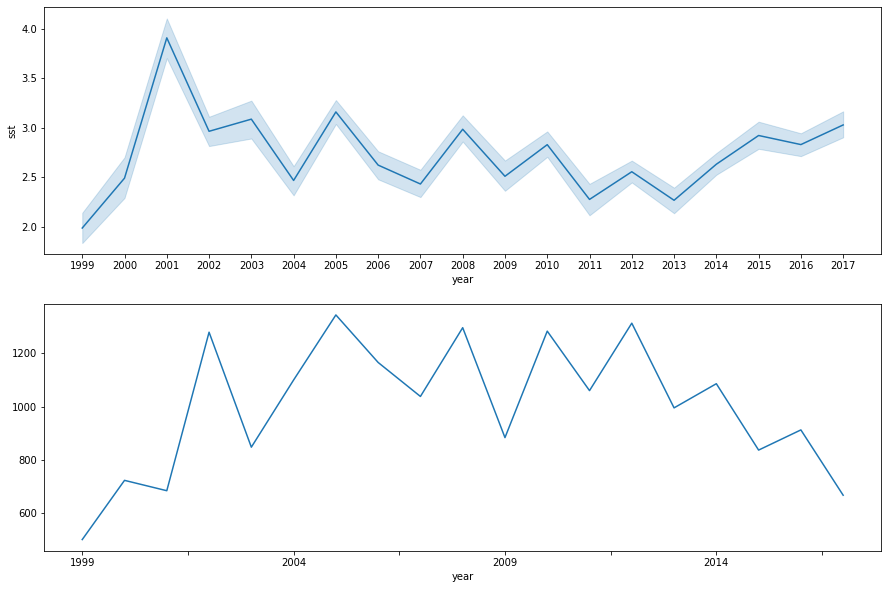

In [58]:
fig, ax = plt.subplots(2,1)
sns.lineplot(x = "year", y = "sst", data = data[data["scientificName"] == "Calanus simillimus"], ax = ax[0])
data[data["scientificName"] == "Calanus simillimus"].groupby("year").scientificName.count().plot(ax = ax[1]);

There might be some correlation we can possibly find out.

## Conclusions
+ We tried to find out co-occurrence of any other zooplankton species with *Oithona similis* but couldn't find one.